In [157]:
import nltk
import string
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [5]:
df =  pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={"v1": "target", "v2" : "text"}, inplace = True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
encoder = LabelEncoder()

In [14]:
df["target"] = encoder.fit_transform(df["target"])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep = "first")

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

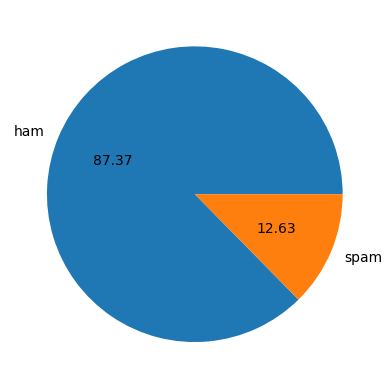

In [30]:
plt.pie(df["target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

In [57]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
df["num_characters"] = df["text"].apply(len)

In [35]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df["num_sentences"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df["target"] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df[df["target"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

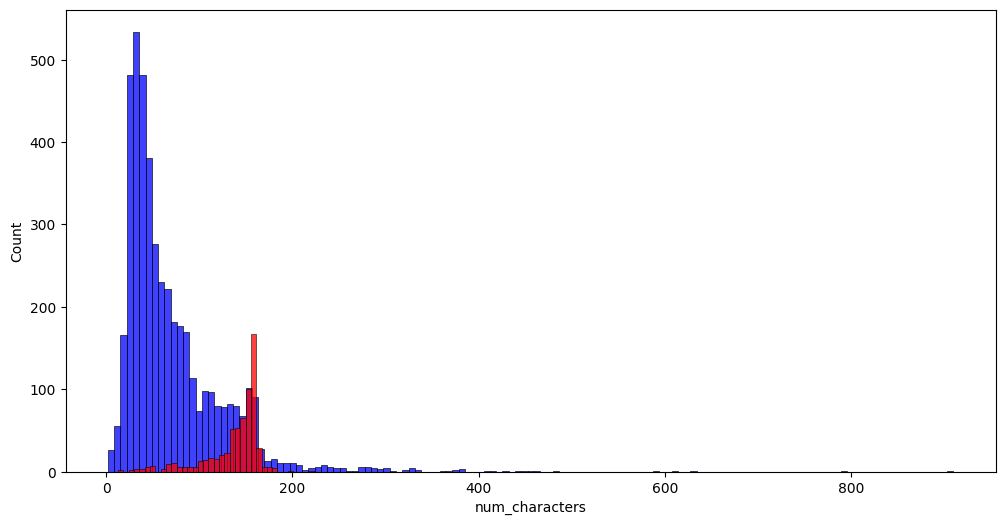

In [48]:
plt.figure(figsize = (12,6))
sns.histplot(df[df["target"] == 0]["num_characters"], color = "blue")
sns.histplot(df[df["target"] == 1]["num_characters"], color = "red")

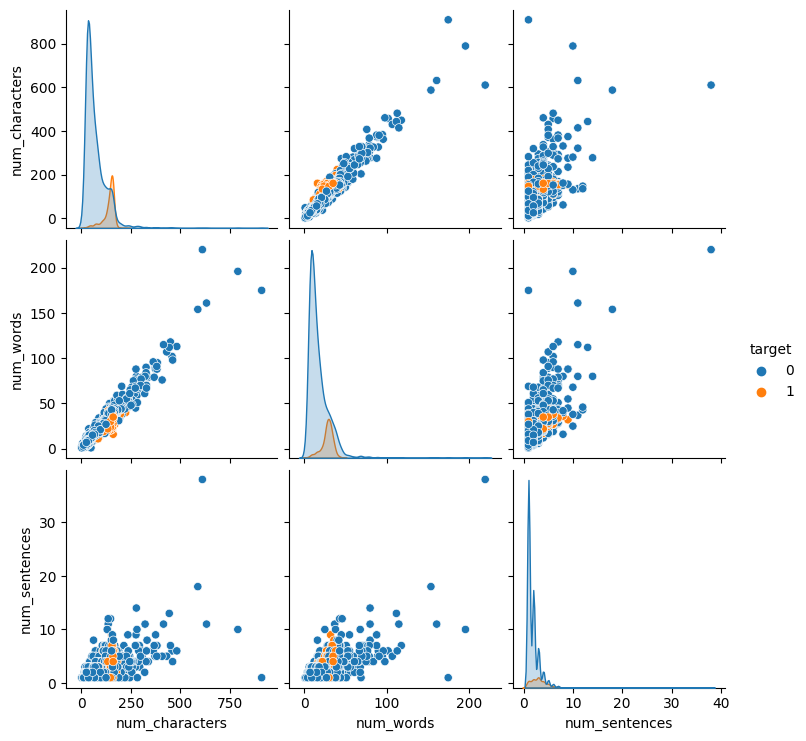

In [49]:
sns.pairplot(df, hue = "target")

<ipython-input-51-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

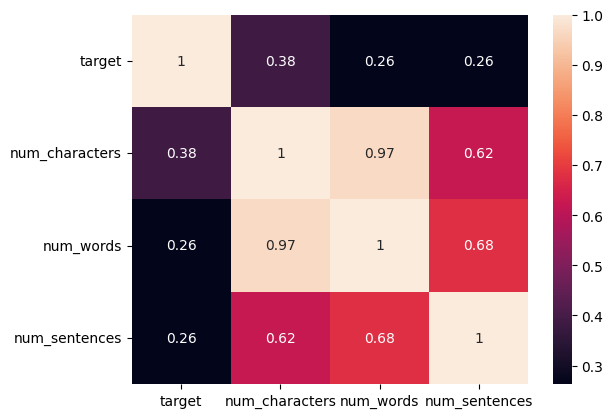

In [51]:
sns.heatmap(df.corr(), annot = True)

In [55]:
def transform_text(text) :
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text :
    if i.isalnum() :
      y.append(i)

  text = y[:]
  y.clear()

  for i in text :
    if i not in stopwords.words("english") and i not in string.punctuation :
      y.append(i)

  text = y[:]
  y.clear()
  ps = PorterStemmer()

  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)

In [58]:
df["transformed_text"] = df["text"].apply(transform_text)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
wc = WordCloud(width = 500, height = 500, min_font_size = 5, background_color = "white")

In [68]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep = " "))

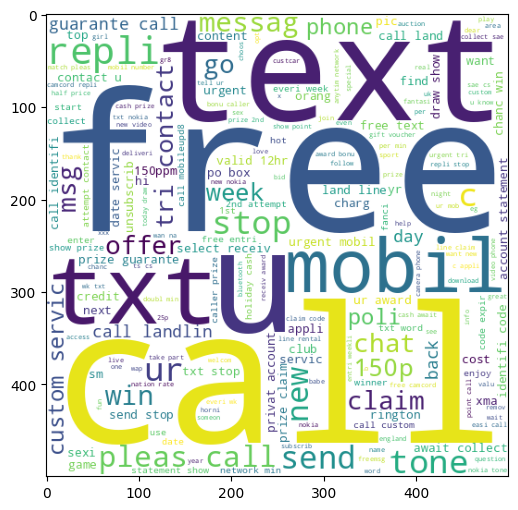

In [69]:
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

In [70]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = " "))

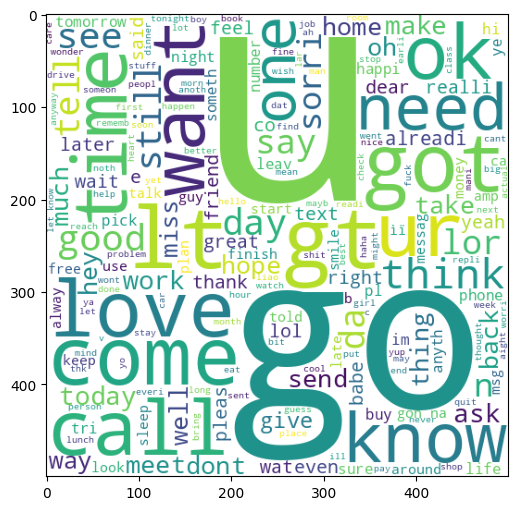

In [71]:
plt.figure(figsize = (12, 6))
plt.imshow(ham_wc)

In [72]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist() :
  for word in msg.split() :
    spam_corpus.append(word)

In [73]:
len(spam_corpus)

9939

In [76]:
most_common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_spam_words

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


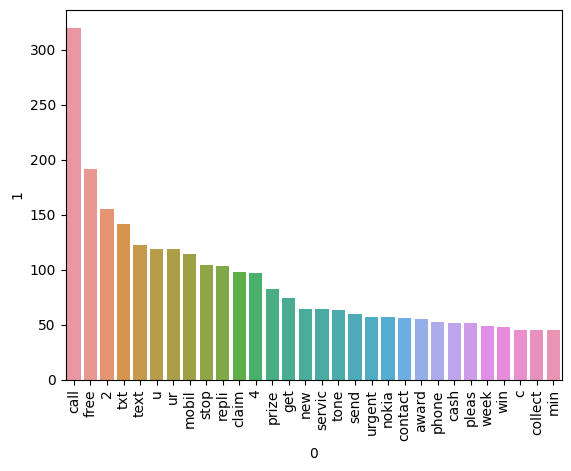

In [83]:
sns.barplot(x = most_common_spam_words[0], y = most_common_spam_words[1])
plt.xticks(rotation = "vertical")
plt.show()

In [84]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist() :
  for word in msg.split() :
    ham_corpus.append(word)

In [85]:
len(ham_corpus)

35404

In [87]:
most_common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_ham_words

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


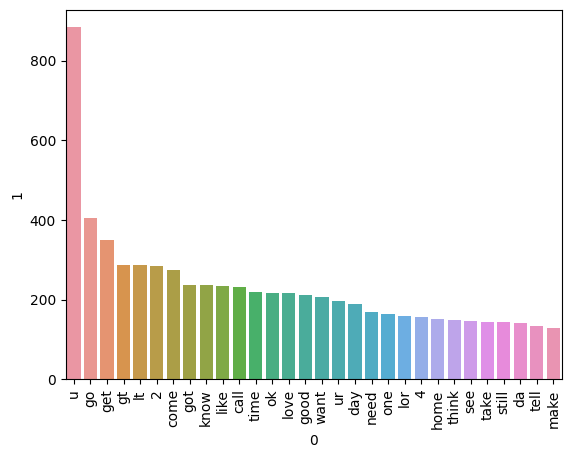

In [88]:
sns.barplot(x = most_common_ham_words[0], y = most_common_ham_words[1])
plt.xticks(rotation = "vertical")
plt.show()

In [90]:
cv = CountVectorizer()

In [91]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [92]:
X.shape

(5169, 6708)

In [93]:
y = df["target"].values

In [94]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [101]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [102]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

In [103]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [104]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [108]:
tfidf = TfidfVectorizer()

In [110]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [111]:
X.shape

(5169, 6708)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [117]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [118]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [119]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

In [120]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [121]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

In [122]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [124]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
}

In [125]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [127]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision, "\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828 

For  KN
Accuracy -  0.9003868471953579
Precision -  1.0 

For  NB
Accuracy -  0.9593810444874274
Precision -  1.0 

For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381 

For  LR
Accuracy -  0.9516441005802708
Precision -  0.94 

For  RF
Accuracy -  0.971953578336557
Precision -  1.0 



In [128]:
performance_df = pd.DataFrame({"Algorithm" : clfs.keys(), "Accuracy" : accuracy_scores, "Precision" : precision_scores}).sort_values('Precision', ascending = False)

In [129]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095


In [130]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [131]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,SVC,Accuracy,0.972921
4,LR,Accuracy,0.951644
5,DT,Accuracy,0.935203
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,1.000000
9,SVC,Precision,0.974138


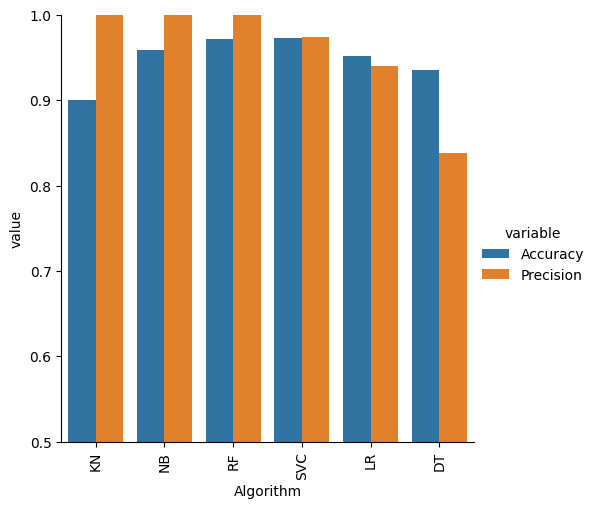

In [133]:
sns.catplot(x = "Algorithm", y = "value", hue = "variable", data = performance_df1, kind = "bar", height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = "vertical")
plt.show()

In [135]:
estimators = [('svc', svc), ('mnb', mnb)]
final_estimator = RandomForestClassifier()

In [136]:
stacking_clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [140]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svc', SVC(gamma=1.0, kernel='sigmoid')),
                               ('mnb', MultinomialNB())],
                   final_estimator=RandomForestClassifier())

In [143]:
y_pred = stacking_clf.predict(X_test)

In [144]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9461538461538461


In [158]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(rfc, open('model.pkl','wb'))